In [3]:
from IPython.display import display, Image
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

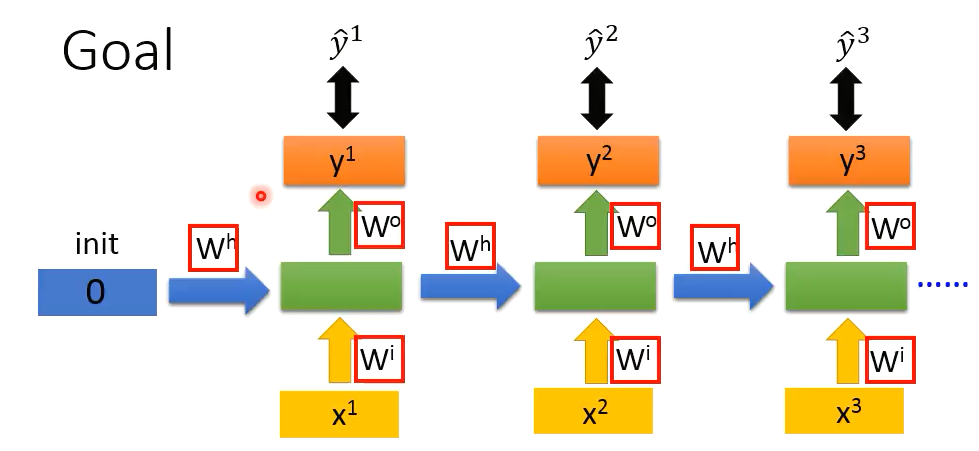

In [4]:
Image('https://raw.githubusercontent.com/martin-1992/deep-learning-note/\
master/Training%20Recurrent%20Neural%20Network/training_rnn01.png')

定义损失函数:
$$ C = \frac{1}{2} \sum_{n=1}^{N}\left \| y^{n} - \widehat{y}^{n} \right \|^{2} \\
C^{n} = \left \| y^{n} - \widehat{y}^{n} \right \|^{2}$$

同DNN一样，对权重矩阵求梯度，这里需要对三个权重矩阵更新参数，即Wh、Wo、和Wi，更新公式为：
$$ w \leftarrow  w - \eta \partial C^{n} \  / \  \partial w $$

RNN权重更新保持一致，方法：
- 初始值W1和W2都设一样；
- W1权重更新时，W2权重也更新，即W1和W2一起更新权重：
$$W_{1} \leftarrow  W_{1} - \frac{\partial C}{\partial W_{1}} - \frac{\partial C}{\partial W_{2}} \\
W_{2} \leftarrow  W_{2} - \frac{\partial C}{\partial W_{2}} - \frac{\partial C}{\partial W_{1}}$$
- W1和W2实际是指针，指向同样的memory，更新时是更新这块memory weight

RNN难以训练，其error surface比DNND的要崎岖。即error surface在有些地方斜率很小，非常平坦，在有些地方斜率很大，但没有太多中间值。如下图，橘色点为当前RNN训练的参数，当你不断更新参数时，突然橘色点跳到上面，导致cost一下变得很高。

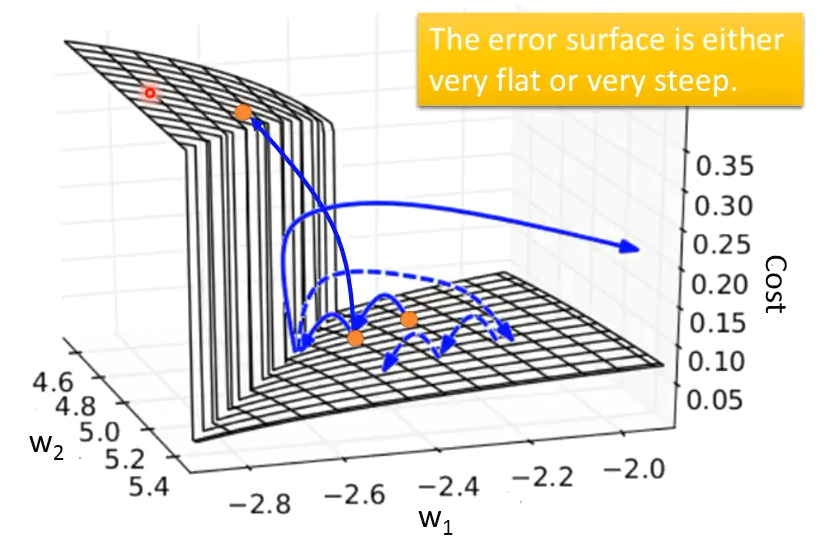

In [5]:
Image('https://raw.githubusercontent.com/martin-1992/deep-learning-note/master/\
Training%20Recurrent%20Neural%20Network/training_rnn02.png')

In [ ]:
RNN是一个很深的DNN，它也会遇到梯度爆炸和梯度消失问题，但产生机制不同

假设一个简单的神经网络，输入层都为0，memory的初始值设为1， ,隐藏层只有一个神经元，激活函数为线性（一般线性函数不会遇到梯度爆炸或消失问题）。所以y(n) = W^n，输入层都为0，只累积memory的。这时小小改变W，都会遇到梯度爆炸和梯度消失的问题

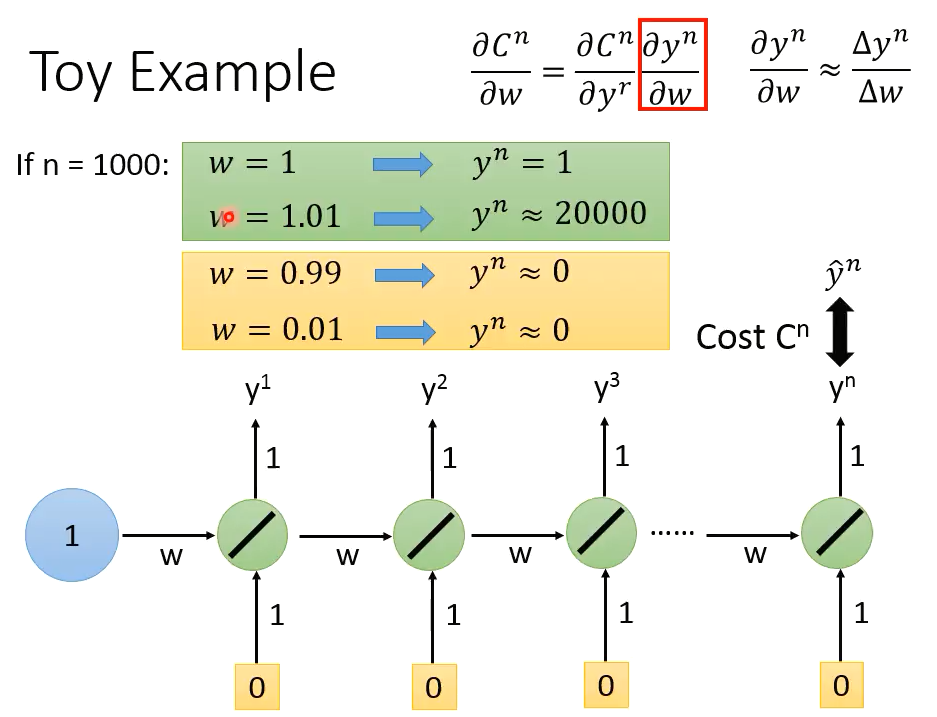

In [6]:
Image('https://raw.githubusercontent.com/martin-1992/deep-learning-note/master/\
Training%20Recurrent%20Neural%20Network/training_rnn03.png')

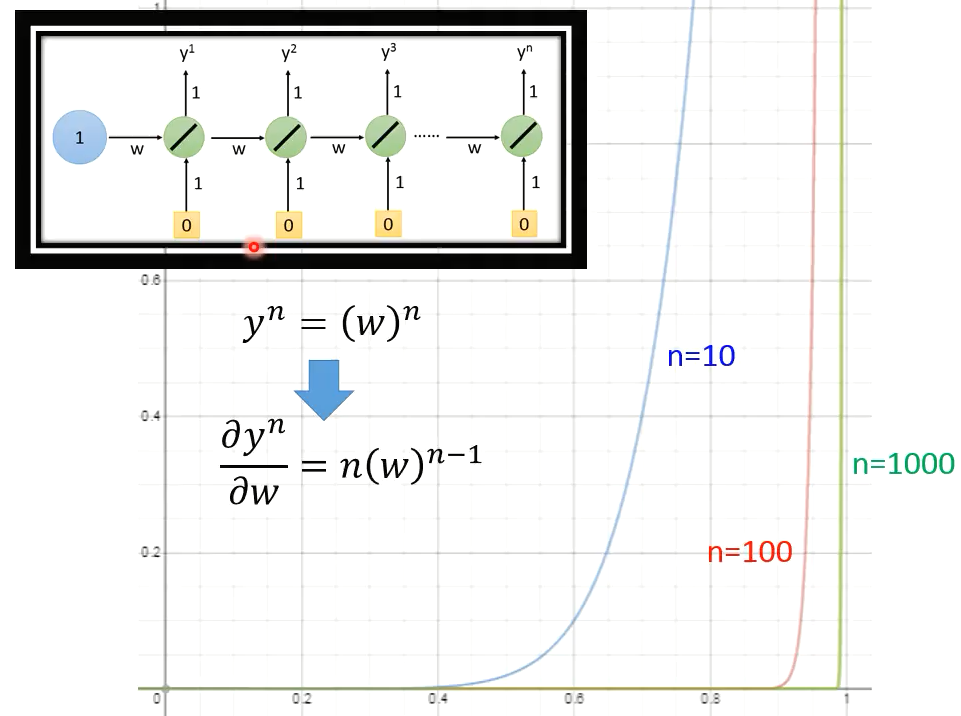

In [7]:
Image('https://raw.githubusercontent.com/martin-1992/deep-learning-note/master/\
Training%20Recurrent%20Neural%20Network/training_rnn04.png')

In [ ]:
对于RNN，激活函数使用sigmoid或者tanh，梯度爆炸或消失问题会减轻很多。

In [ ]:
RNN的反向传播中，每通过一层都会乘上一个Wh.T

解决方法：
- 限制RNN的梯度，如不能大于5，当梯度大于5则设为5；
- 使用NAG，RNN会有很多峡谷valley，因为微分的值变化很快。当横坐标的值变化很小，纵坐标的值变化很快。红线的梯度下降会缓慢下降，而绿线的动量因为带有前面的惯性（梯度），所以会成锯齿状移动，比红线的梯度下降快。